<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Bayesian Paper Figures
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 14pt; color: green;"> Web Links:</span>
<ol>
    <li>Latest draft <span style="font-size: 17px; color: red;">&#10145;</span> 
    <a href="https://docs.google.com/document/d/12eSfhWnAeoUkK7Thtg2Uu3TRNPoc01nZvtP-wd8_gMo/edit">Felikson et al, 2024</a>
    </li>
    <li>Google Drive<a href="https://drive.google.com/drive/u/1/folders/1-TLNuYqtY_WAgig2PP9dFavE7MPFToIU"> (LINK) </a></li>
    <li>OLD: Outline and group paper:<a href="https://docs.google.com/document/d/12m-c9fadnrJwwsSBS3rPiVQBRuusdT6O-bqZ-HCNwsU/edit">draft</a></li>
    <li>Synopsis framework for Nature Reviews Earth & Environment: <a href="https://docs.google.com/document/d/12eSfhWnAeoUkK7Thtg2Uu3TRNPoc01nZvtP-wd8_gMo/edit">link</a></li>
    <li>PK/Bob section on Total sea level <a href="https://docs.google.com/document/d/1f2_aIJQ9_wR_prMBrcS7PoP4TXC4e97Uiikg8Rs_8xA/edit">googleDoc</a></li>


     
</ol>

<span style="font-size:14pt; font-family:'Courier New', monospace; color:black"> <b>To substantiate from figure</b>   
the point about deep uncertainty produce a version of the figure for wf4.  
the point that we are better off focusing on the individual components, as opposed to comparing tide gauge data to projections 
<br>


<br><br><br>

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">

In [1]:
from IPython.display import display, Image, HTML, Video

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 FACTS 
 <span style="font-size: 14pt; color: black;"> produces <span style="font-size: 22pt; color: green;">Total SL projections </span>, <br>
 calculated by aggregating component probability distributions into probability distributions for total GMSL and RSL change </span>
  
</p>

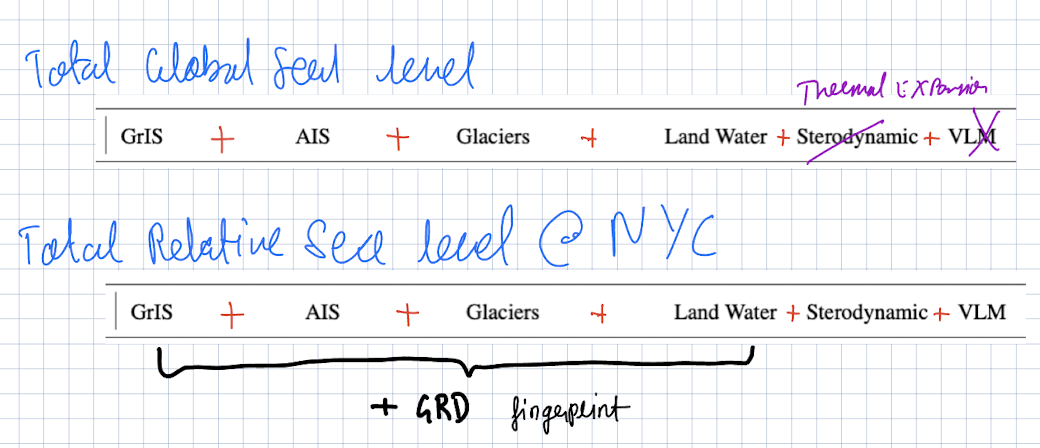

In [2]:
display(Image('./_IP_fig/TotSL.png'))

<nb>

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Also check
</span>
<br>
<a href="https://sealevel.nasa.gov/understanding-sea-level/regional-sea-level/overview/">Regional Relative Sea-Level Change</a>

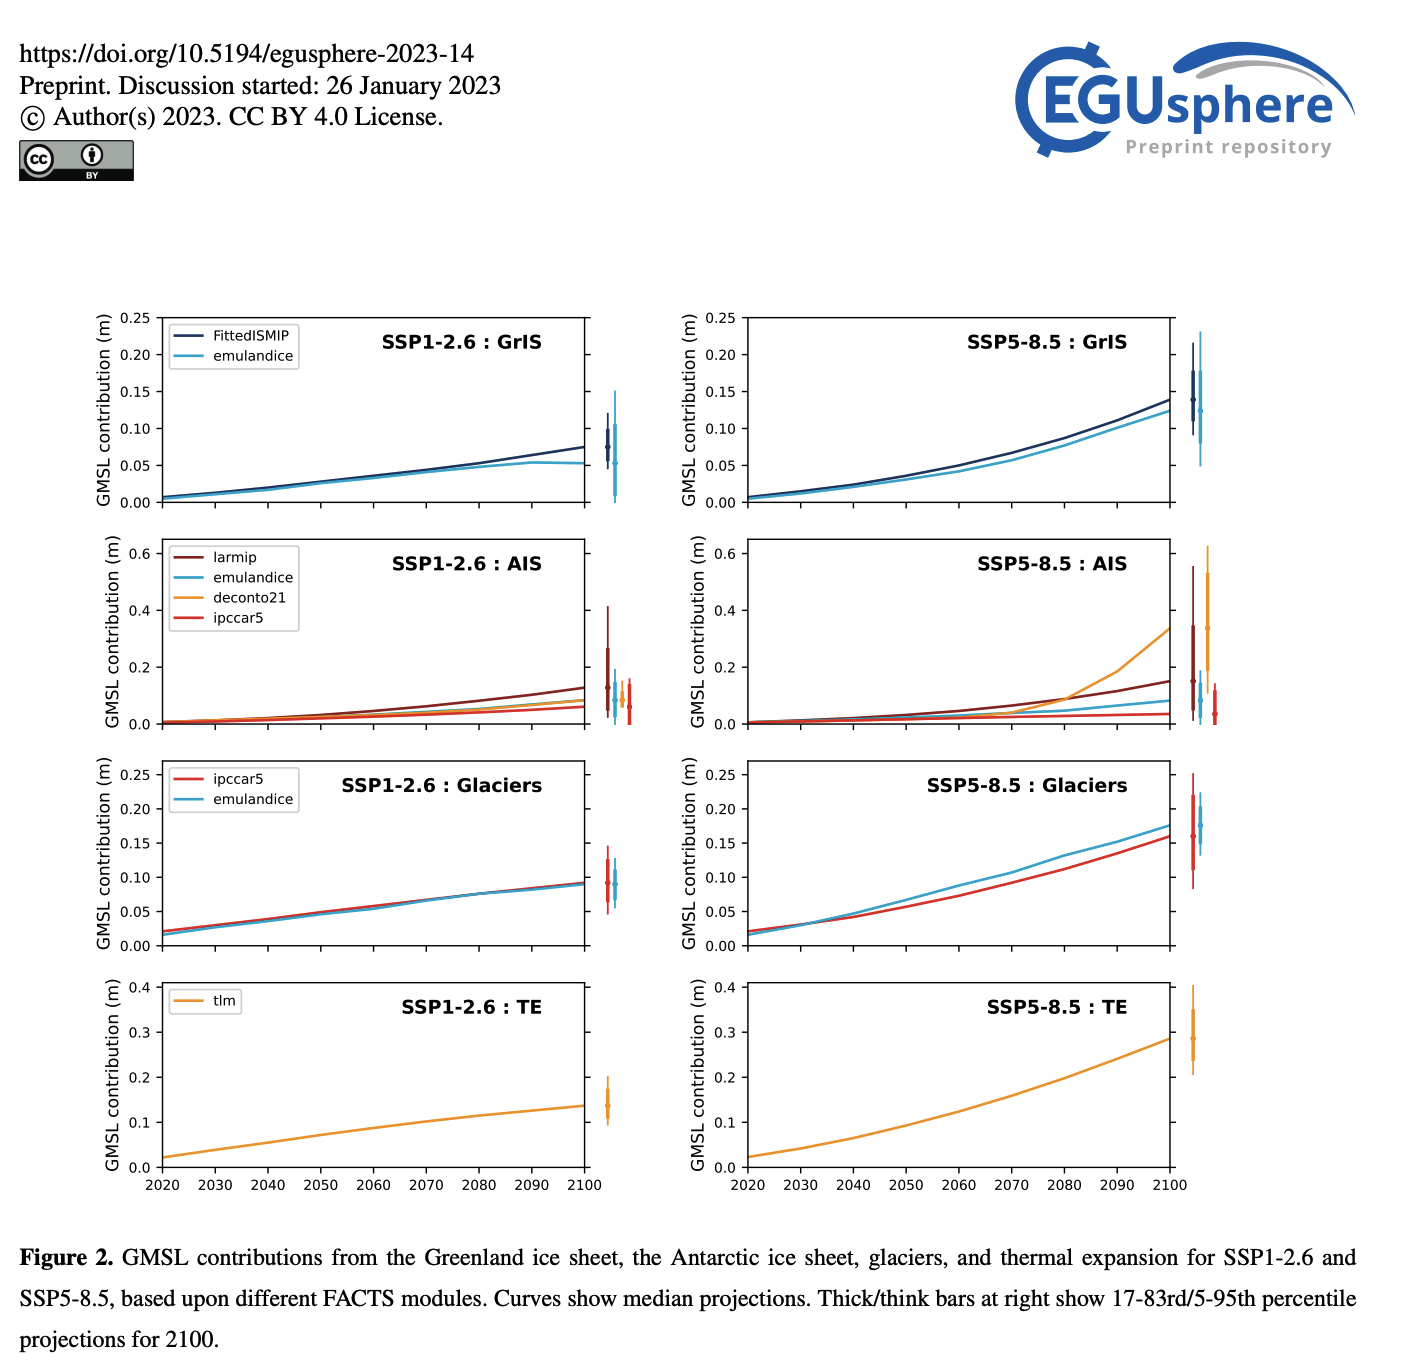

In [3]:
display(Image('./_IP_fig/proj_Compop.png'))

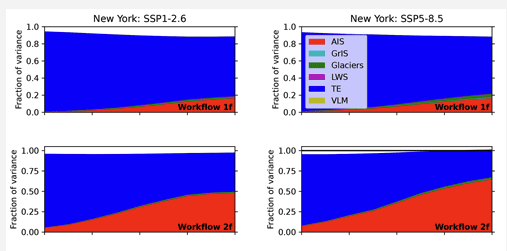

In [4]:
display(Image('./_IP_fig/VarDecomp_proj_Compop.png'))

Background 

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 FACTS workflow description 
</p>

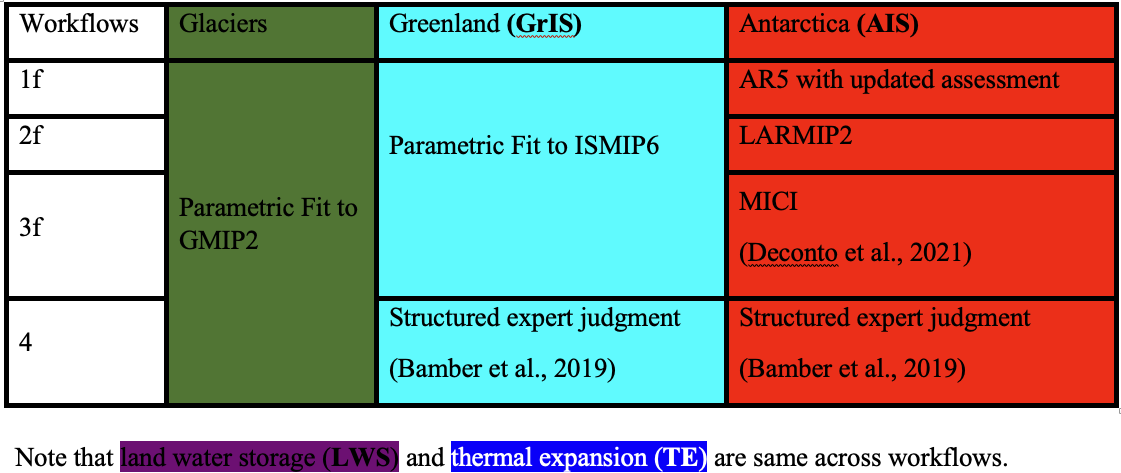

In [6]:
display(Image('./_IP_fig//wf_F.png'))

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import os

import fun_CondProb as fn

<span style="font-size: 22px; color: green;"> LIST :: FACTS 1.1.1 run datasets</span> 
    

In [ ]:
ssp='ssp245'
# path = f'/projects/kopp/ar2208/factsv1.1.1/coupling.{ssp}/output/'
# path = os.path.expanduser(f'~/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/')
path = os.path.expanduser(f'~/werk.M2/0000_facts-OPdata.M2/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/')
files=fn.list_files_with_names(path, ["global"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
print(df.to_string(index=False))

### T0 Edit for final-sih.
- Check notability for the notes
- Chk bin-width grid-int
- Marking of the 83/17th percentiles on the violin
- Figure axis percentiles

In [ ]:
ssps = ['ssp119', 'ssp126','ssp245','ssp370', 'ssp585']
#
station=0; 
#
start_year=2020; end_year=2100; unit='cm'; 
#
# Base path of data folder (all ssp).
base_path = os.path.expanduser(f'~/werk.M2/0000_facts-OPdata.M2/amarel/ar2208/factsv1.1.1')
#
# Dictionary of filenames
file_names = {
    'GMSL_1f': 'total.workflow.wf1f.global.nc',                          'NYC-RSL_1f': 'total.workflow.wf1f.local.nc',
    'AIS_ar5_global': 'ar5AIS.ipccar5.icesheets_AIS_globalsl.nc',           'AIS_ar5_local': 'ar5AIS.ipccar5.icesheets_AIS_globalsl.nc', 

    'GMSL_2f': 'total.workflow.wf2f.global.nc',                          'NYC-RSL_2f': 'total.workflow.wf2f.local.nc',
    'AIS_larmip_global' : 'larmip.larmip.AIS_globalsl.nc',                  'AIS_larmip_local' : 'larmip.larmip.AIS_localsl.nc',

    'GMSL_3f': 'total.workflow.wf3f.global.nc',                          'NYC-RSL_3f': 'total.workflow.wf3f.local.nc',
    'AIS_d21_global' : 'deconto21.deconto21.AIS_AIS_globalsl.nc',           'AIS_d21_local' : 'deconto21.deconto21.AIS_AIS_localsl.nc',

    'GMSL_4': 'total.workflow.wf4.global.nc',                            'NYC-RSL_4': 'total.workflow.wf4.local.nc',
    'AIS_b19_global' : 'bamber19.bamber19.icesheets_AIS_globalsl.nc',       'AIS_b19_local' : 'bamber19.bamber19.icesheets_AIS_localsl.nc',
    
    
    'TE'  : 'ocean.tlm.sterodynamics_globalsl.nc',                          'SD'  : 'ocean.tlm.sterodynamics_localsl.nc', 
}
#
# Dictionary to store the results
all_ssp = {key: {} for key in file_names}

# Loop over each SSP scenario
for ssp in ssps:
    for key, filename in file_names.items():
        file_path = f'{base_path}/coupling.{ssp}/output/coupling.{ssp}.{filename}'
        dat, slc, time, lat, lon = fn.extract_nc_info(file_path, station, unit, start_year, end_year)
        all_ssp[key][ssp] = {'dat': dat, 'slc': slc, 'time': time, 'lat': lat, 'lon': lon, 'path': file_path, 'filename': filename}
del dat, slc, time, lat, lon, ssp, file_path, key, file_names, filename

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Plot Params 
</span>


In [ ]:
# currently only 1 ssp allowed
plotOPT = {
    'ssps' : 'ssp245', 
    'plt_og' : 'NO', 'fix_ax_lim' : 'YES',
    'plt_scatter' : 'NO',
    'val' : 'none',
    'plotCBAR':'YES', 'cmap':'Reds', 'c_bar_min': 0.001, 'c_bar_max': 0.252,
    'kernel' : 'gaussian', 'bw_kde':10, 'kde_grid_int' : 100, 'grid' : 'Fixed',
    'sns_kde':'NO',
    'y_ax_min' : 0, 'y_ax_max' : 150, 
    'plt_overlay' : 'none',  'num_violins' : 10,
    'mark_ax_ptile' : 'NO', 'ptile_table' :'NO',
}

<hr style="border: none; height: 2px; background-color: red; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    Posterior NYC total SL Densities in 2100 conditional on
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    <li>2030 GMSL observations TOTAL </li>
    <li>2030 RSL observation TOTAL </li>
    <li>2030 Thermal Expansion</li>
    <li>2030 Sterodynamic observations</li>
    <li>2030 AIS component</li>
</ol>

In [ ]:
# wf, aiscomp = '1f', 'ar5'  
wf, aiscomp = '2f', 'larmip'  
# wf, aiscomp = '3f', 'd21'  
# wf, aiscomp = '4', 'b19'  

In [ ]:
time_pairs = [(2030, 2100)]  # [(2030, 2050), (2030, 2100), (2050, 2100)]
for T1, T2 in time_pairs:
    plot_params = {
        0: {'var1': all_ssp[f'NYC-RSL_{wf}'], 't1': T1,            'var2': all_ssp[f'NYC-RSL_{wf}'], 't2': T2},
        1: {'var1': all_ssp[f'GMSL_{wf}'], 't1': T1,               'var2': all_ssp[f'NYC-RSL_{wf}'], 't2': T2},
        2: {'var1': all_ssp['TE'], 't1': T1,                    'var2': all_ssp[f'NYC-RSL_{wf}'], 't2': T2},
        3: {'var1': all_ssp['SD'], 't1': T1,                    'var2': all_ssp[f'NYC-RSL_{wf}'], 't2': T2},
        4: {'var1': all_ssp[f'AIS_{aiscomp}_global'], 't1': T1,     'var2': all_ssp[f'NYC-RSL_{wf}'], 't2': T2},
    }

In [ ]:
for T1, T2 in time_pairs:
    plotOPT.update({
        'plt_og': 'YES', 'plt_scatter': 'NO', 'ptile_table' :'NO',
        'val': 'none',
        'YaxLab_disp': 'NO',
        'sns_kde':'NO'})
    fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

In [ ]:
plotOPT.update({'mark_ax_ptile': 'YES', 'ptile_table' :'YES',})

In [ ]:
# for T1, T2 in time_pairs:
#     plotOPT.update({
#         'plt_og': 'NO', 'plt_scatter': 'YES',     
#         'val': 'none',
#         'sns_kde':'NO'})
    
#     print(f"{T2} 'vs' {T1}")
#     fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

In [ ]:
for T1, T2 in time_pairs:
    plotOPT.update({
        'plt_og': 'NO', 'plt_scatter': 'NO', 'sns_kde':'NO',
        'grid' : 'data_MaxMin',#'grid' : 'Fixed',
        'val': 'density_values_Normalized', 'bw_kde':1,'kde_grid_int' : 100, 'c_bar_max': 0.2, 'c_bar_int': 6,
        'y_ax_max' : 300 if T2 > 2050 else 100,
        'plotCBAR' : 'YES_1',
    })
    print(f"{T2} 'vs' {T1}") 
    plot_output = fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

In [ ]:
# for T1, T2 in time_pairs:
#     plotOPT.update({
#         'plt_og': 'NO', 'plt_scatter': 'NO', 'sns_kde':'NO',
#         'grid' : 'data_MaxMin',#'grid' : 'Fixed',
#         'val': 'density_values_Normalized', 'bw_kde':'auto','kde_grid_int' : 100, 'c_bar_max': 0.2, 'c_bar_int': 6,
#         'y_ax_max' : 300 if T2 > 2050 else 100,
#         'plotCBAR' : 'YES_1',
#     })
#     print(f"{T2} 'vs' {T1}")
#     fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<span style="font-size: 12pt; color: blue; font-family: 'Times New Roman';"> SCRATCH </span>  

<hr style="border: none; height: 2px; background-color: blue; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    2050/2100 NYC projections conditional on GMSL contribution of AIS Component
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    <li>2030 AR5</li>
    <li>2030 larmip</li>
    <li>2030 d21</li>
    <li>2030 b19</li>
</ol>

In [ ]:
# time_pairs = [(2030, 2100)]  # [(2030, 2050), (2030, 2100), (2050, 2100)]
# for T1, T2 in time_pairs:
#     plot_params = {
#         0: {'var1': all_ssp['AIS_ar5_global'], 't1': T1,        'var2': all_ssp['NYC-RSL_1f'], 't2': T2},
#         1: {'var1': all_ssp['AIS_larmip_global'], 't1': T1,     'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
#         2: {'var1': all_ssp['AIS_d21_global'], 't1': T1,        'var2': all_ssp['NYC-RSL_3f'], 't2': T2},
#         3: {'var1': all_ssp['AIS_b19_global'], 't1': T1,        'var2': all_ssp['NYC-RSL_4'], 't2': T2}
#     }

In [ ]:
# for T1, T2 in time_pairs:
#     plotOPT.update({
#         'plt_og': 'NO', 'plt_scatter': 'NO', 'sns_kde':'NO',
#         'grid' : 'data_MaxMin',#'grid' : 'Fixed',
#         'val': 'density_values_Normalized', 'bw_kde':'auto','kde_grid_int' : 100, 'c_bar_max': 0.2, 'c_bar_int': 6,
#         'y_ax_max' : 300 if T2 > 2050 else 100,
#         'plotCBAR' : 'YES_1',
#     })
#     print(f"{T2} 'vs' {T1}")
#     fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)


<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    TOTAL GMSL (WF) projections conditional on AIS Component
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    <li>2030 AIS ar5    <b>global</b> </li>
    <li>2030 AIS larmp  <b>global</b> </li>
    <li>2030 AIS d21    <b>global</b> </li>
    <li>2030 AIS b19    <b>global</b> </li>
</ol>

In [ ]:
# # time_pairs = [(2030, 2050), (2030, 2100), (2050, 2100)]  # Example pairs
# time_pairs = [(2030, 2050)]
# for T1, T2 in time_pairs:
#     plot_params = {
#         0: {'var1': all_ssp['AIS_ar5_global'], 't1': T1,           'var2': all_ssp['GMSL_1f'], 't2': T2},
#         1: {'var1': all_ssp['AIS_larmip_global'], 't1': T1,        'var2': all_ssp['GMSL_2f'], 't2': T2},
#         2: {'var1': all_ssp['AIS_d21_global'], 't1': T1,           'var2': all_ssp['GMSL_3f'], 't2': T2},
#         3: {'var1': all_ssp['AIS_b19_global'], 't1': T1,           'var2': all_ssp['GMSL_4'], 't2': T2},
#         4: {'var1': all_ssp['TE'], 't1': T1,           'var2': all_ssp['GMSL_2f'], 't2': T2}
#     }
#     plotOPT.update({'num_violins': 2, 'plotCBAR': 'YES_1', 'y_ax_max' : 200 if T2 > 2050 else 100})
#     print(f"{T2} 'vs' {T1}")
#     fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

In [ ]:
# # time_pairs = [(2030, 2050), (2030, 2100), (2050, 2100)]  # Example pairs
# time_pairs = [(2030, 2050)]
# for T1, T2 in time_pairs:
#     plot_params = {
#         0: {'var1': all_ssp['TE'], 't1': T1,           'var2': all_ssp['GMSL_1f'], 't2': T2},
#         1: {'var1': all_ssp['TE'], 't1': T1,        'var2': all_ssp['GMSL_2f'], 't2': T2},
#         2: {'var1': all_ssp['TE'], 't1': T1,           'var2': all_ssp['GMSL_3f'], 't2': T2},
#         3: {'var1': all_ssp['TE'], 't1': T1,           'var2': all_ssp['GMSL_4'], 't2': T2},
#     }
#     plotOPT.update({'num_violins': 2, 'plotCBAR': 'YES_1', 'y_ax_max' : 200 if T2 > 2050 else 100})
#     print(f"{T2} 'vs' {T1}")
#     fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    TOTAL NYC-WF-SL projections conditional on TOTAL GLOBAL 
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: black;">
    <li>2030 GMSL-WF (AR5)</li>
    <li>2030 GMSL-WF (larmip)</li>
    <li>2030 GMSL-WF (d21)</li>
    <li>2030 GMSL-WF (b19)</li>
</ol>

In [ ]:
# time_pairs = [(2030, 2050), (2030, 2100), (2050, 2100)]  # Example pairs
# for T1, T2 in time_pairs:
#     plot_params = {
#         0: {'var1': all_ssp['GMSL_1f'], 't1': T1,       'var2': all_ssp['NYC-RSL_1f'], 't2': T2},
#         1: {'var1': all_ssp['GMSL_2f'], 't1': T1,       'var2': all_ssp['NYC-RSL_2f'], 't2': T2},
#         2: {'var1': all_ssp['GMSL_3f'], 't1': T1,       'var2': all_ssp['NYC-RSL_3f'], 't2': T2},
#         3: {'var1': all_ssp['GMSL_4'], 't1': T1,        'var2': all_ssp['NYC-RSL_4'], 't2': T2}
#     }
#     plotOPT.update({'num_violins': 10, 'plotCBAR': 'YES_1', 'y_ax_max' : 200 if T2 > 2050 else 100})
#     print(f"{T2} 'vs' {T1}")
#     fn.plot_ConditionalProb_panel(all_ssp,plot_params,plotOPT)